In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.sample(6)

,sms,label
297,Unless it's a situation where YOU GO GURL woul...,0
1285,But if she.s drinkin i'm ok.\n,0
5156,"Like &lt;#&gt; , same question\n",0
349,Fancy a shag? I do.Interested? sextextuk.com t...,1
1646,I.ll post her out l8r. In class\n,0
3828,Congratulations U can claim 2 VIP row A Ticket...,1


In [ ]:
df.shape

(5574, 2)

1. Data Cleaning



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'label':'Target'},inplace=True)

In [ ]:
df.sample(5)

,sms,Target
1878,This pen thing is beyond a joke. Wont a Biro d...,0
4510,Ü takin linear algebra today?\n,0
1457,U sleeping now.. Or you going to take? Haha.. ...,0
977,Ok i shall talk to him\n,0
986,Carlos says he'll be at mu in &lt;#&gt; minu...,0


In [ ]:
#check for null values
df.isnull().sum()

,0
sms,0
Target,0


In [ ]:
#check for duplicated value
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5171, 2)

2. EDA


In [ ]:
df.head()

,sms,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['Target'].value_counts()

,count
Target,
0,4518
1,653


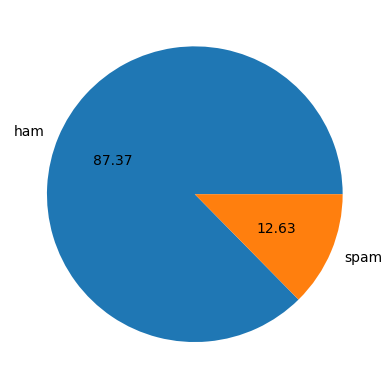

In [ ]:
from enum import auto
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters']=df['sms'].apply(len)

In [ ]:
df.head()

,sms,Target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [ ]:
df['num_words']=df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,sms,Target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [ ]:
df['num_sent']=df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,sms,Target,num_characters,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [ ]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.606459,1.973893
std,58.333188,13.388223,1.458880
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,120.000000,26.500000,2.000000
max,911.000000,220.000000,38.000000


In [ ]:
#for ham
df[df['Target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.282205,1.827579
std,56.590179,13.572746,1.394245
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,38.000000


In [ ]:
#for spam
df[df['Target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.986217
std,29.818940,6.987509,1.494815
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

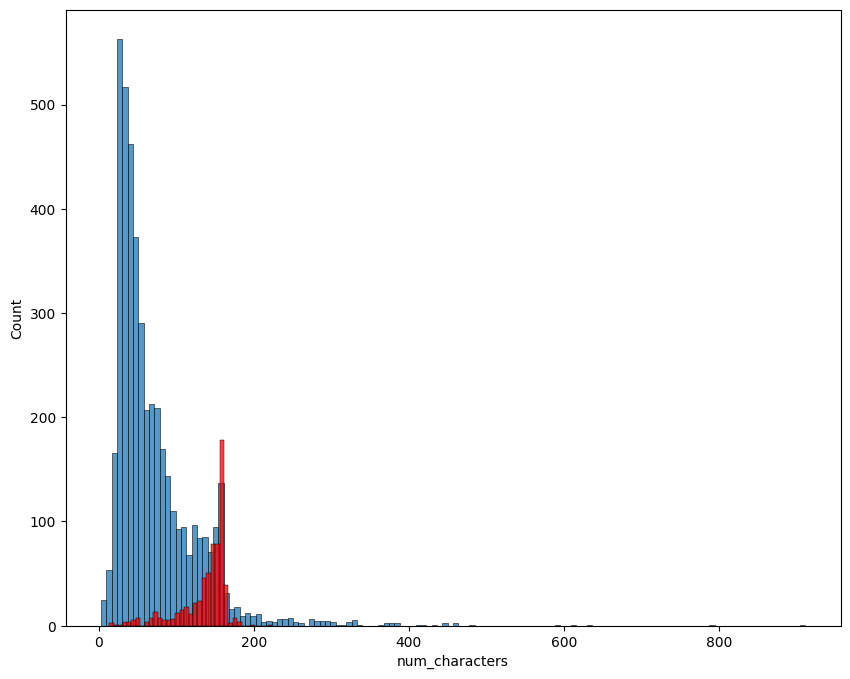

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

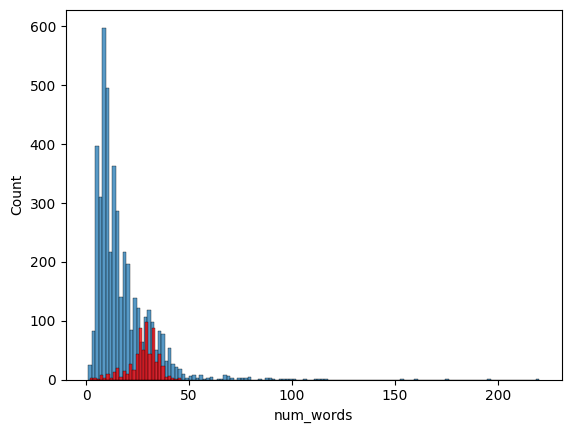

In [ ]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

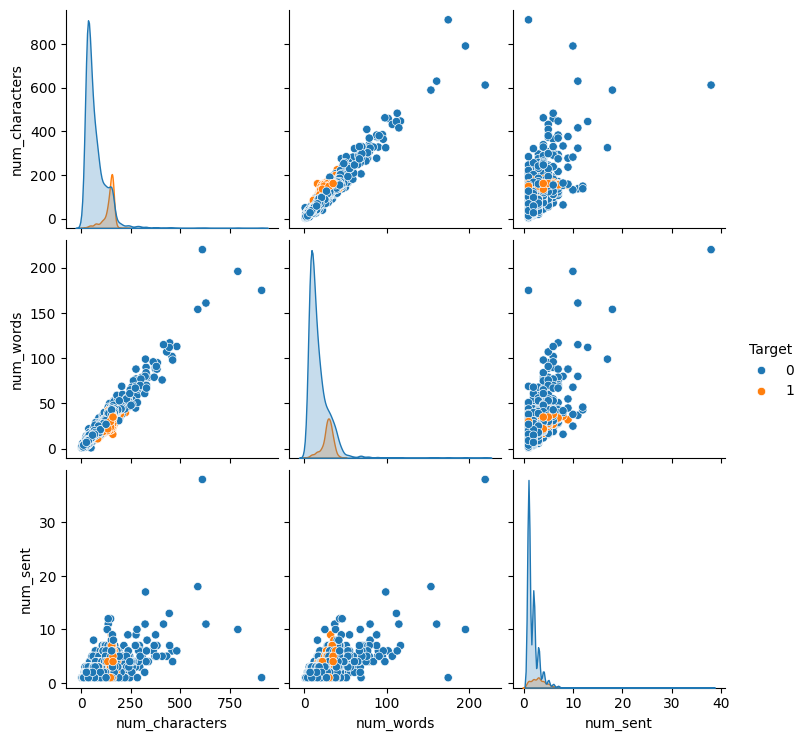

In [ ]:
sns.pairplot(df,hue='Target')

<Axes: >

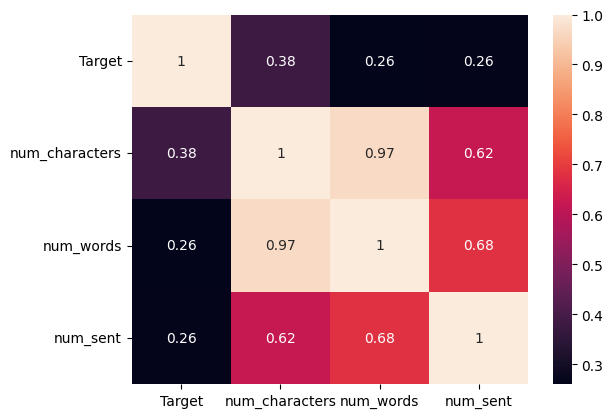

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)


3. Data preprocessing:


*   lowercase
*   tokenization
*   removing special charaters
*   removing stopping words and punctuation
*   stemming:similar words are converted to single word(dance,danced,dancing)




In [ ]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')  # Only once if not already downloaded


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:] ##clooning kri h text ki
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and  i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
 df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('danced')

'danc'

In [ ]:
df['transformed_text']= df['sms'].apply(transform_text)

In [ ]:
df.head()

,sms,Target,num_characters,num_words,num_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc= wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

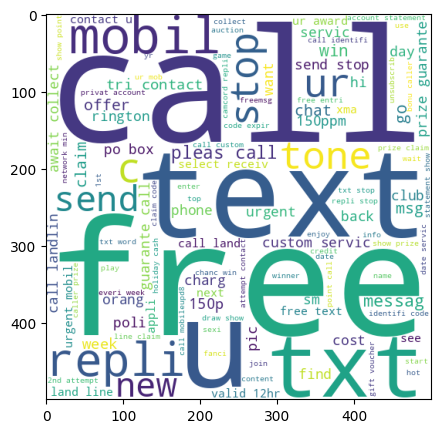

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

In [ ]:
ham_wc= wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

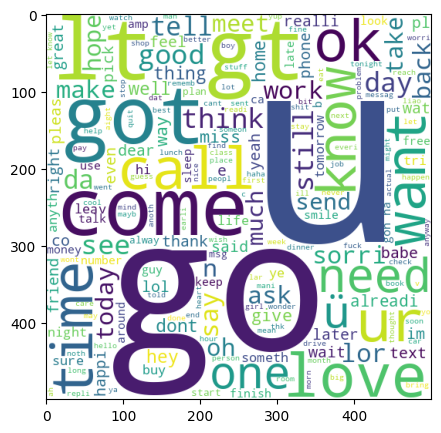

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)

In [ ]:
df.head()

,sms,Target,num_characters,num_words,num_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9982

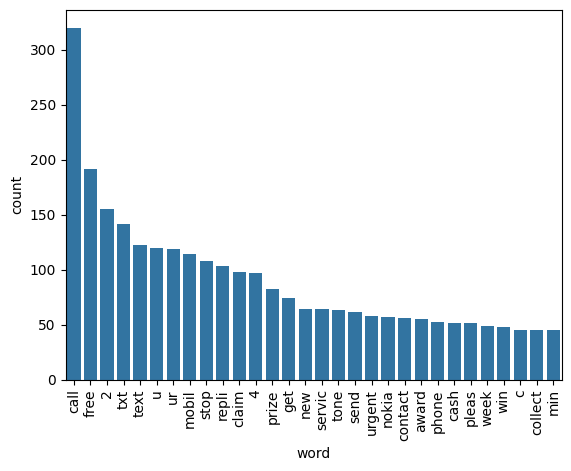

In [ ]:

from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words and convert to DataFrame
top_30 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using Seaborn with keyword arguments
sns.barplot(x='word', y='count', data=top_30)

# Rotate x-axis labels
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35937

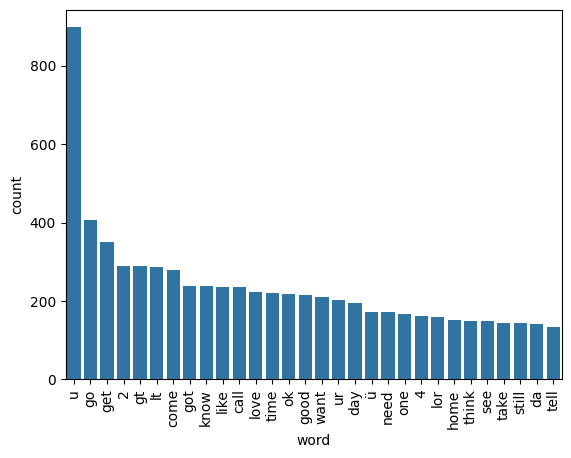

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words and convert to DataFrame
top_30 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot using Seaborn with keyword arguments
sns.barplot(x='word', y='count', data=top_30)

# Rotate x-axis labels
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tf.fit_transform(df['transformed_text']).toarray()


In [ ]:
#appending the num_char col to X
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5171, 3001)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
y=df['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8772946859903382
[[779 108]
 [ 19 129]]
0.5443037974683544


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9739130434782609
[[886   1]
 [ 26 122]]
0.991869918699187


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9719806763285024
[[886   1]
 [ 28 120]]
0.9917355371900827


In [ ]:
#tdidf->mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [ ]:

svc=SVC(kernel='sigmoid',gamma=0.1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC': svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb,

}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision


In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9594202898550724, 1.0)

In [ ]:
precision_scores = []
accuracy_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy: 0.9594202898550724
Precision: 1.0
For KN
Accuracy: 0.8966183574879227
Precision: 1.0
For NB
Accuracy: 0.9739130434782609
Precision: 0.991869918699187
For DT
Accuracy: 0.9294685990338164
Precision: 0.8712871287128713
For LR
Accuracy: 0.9603864734299516
Precision: 1.0
For RF
Accuracy: 0.9652173913043478
Precision: 1.0
For AdaBoost
Accuracy: 0.9342995169082126
Precision: 0.9
For BgC
Accuracy: 0.9429951690821256
Precision: 0.8503937007874016
For ETC
Accuracy: 0.9710144927536232
Precision: 0.9758064516129032
For GBDT
Accuracy: 0.9381642512077295
Precision: 0.92
For xgb
Accuracy: 0.966183574879227
Precision: 0.959349593495935


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.959420,1.000000
1,KN,0.896618,1.000000
4,LR,0.960386,1.000000
5,RF,0.965217,1.000000
2,NB,0.973913,0.991870
8,ETC,0.971014,0.975806
10,xgb,0.966184,0.959350
9,GBDT,0.938164,0.920000
6,AdaBoost,0.934300,0.900000
3,DT,0.929469,0.871287


In [ ]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.959420
1,KN,Accuracy,0.896618
2,LR,Accuracy,0.960386
3,RF,Accuracy,0.965217
4,NB,Accuracy,0.973913
5,ETC,Accuracy,0.971014
6,xgb,Accuracy,0.966184
7,GBDT,Accuracy,0.938164
8,AdaBoost,Accuracy,0.934300
9,DT,Accuracy,0.929469


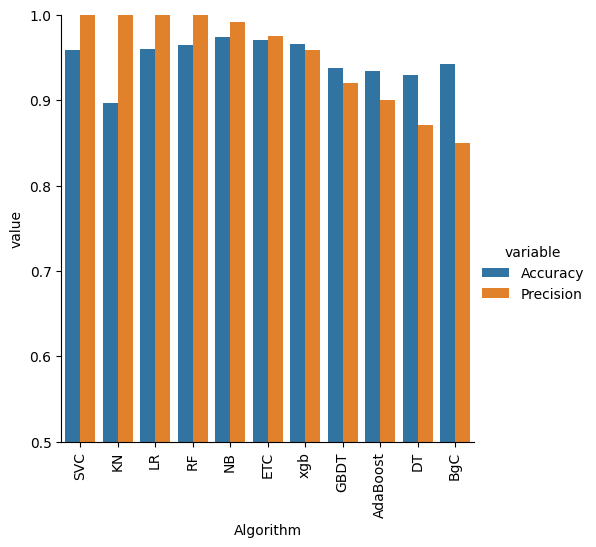

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improve
#1. change the max features of tfidf

In [ ]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})


In [ ]:
temp_df_scaled=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [ ]:
num_char=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy nums_char':accuracy_scores,'Precision nums_char':precision_scores,})

In [ ]:
temp_df.merge(temp_df_scaled,on='Algorithm')

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.959420,1.000000,0.959420,1.000000
1,KN,0.896618,1.000000,0.896618,1.000000
2,NB,0.973913,0.991870,0.973913,0.991870
3,DT,0.929469,0.871287,0.929469,0.871287
4,LR,0.960386,1.000000,0.960386,1.000000
5,RF,0.965217,1.000000,0.965217,1.000000
6,AdaBoost,0.934300,0.900000,0.934300,0.900000
7,BgC,0.942995,0.850394,0.942995,0.850394
8,ETC,0.971014,0.975806,0.971014,0.975806
9,GBDT,0.938164,0.920000,0.938164,0.920000


In [ ]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.959420,1.000000,0.959420,1.000000
1,KN,0.896618,1.000000,0.896618,1.000000
2,LR,0.960386,1.000000,0.960386,1.000000
3,RF,0.965217,1.000000,0.965217,1.000000
4,NB,0.973913,0.991870,0.973913,0.991870
5,ETC,0.971014,0.975806,0.971014,0.975806
6,xgb,0.966184,0.959350,0.966184,0.959350
7,GBDT,0.938164,0.920000,0.938164,0.920000
8,AdaBoost,0.934300,0.900000,0.934300,0.900000
9,DT,0.929469,0.871287,0.929469,0.871287


In [ ]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('moel.pkl','wb'))